# **Loading the data**

In [ ]:
from pathlib import Path
import numpy as np
import pandas as pd

In [ ]:
features_df = pd.read_csv("training_set_features.csv",
    index_col="respondent_id"
)
labels_df = pd.read_csv("training_set_labels.csv",
    index_col="respondent_id"
)
test_df = pd.read_csv('test_set_features.csv',
                      index_col='respondent_id'
)

In [ ]:
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
features_df.dtypes

,0
h1n1_concern,float64
h1n1_knowledge,float64
behavioral_antiviral_meds,float64
behavioral_avoidance,float64
behavioral_face_mask,float64
behavioral_wash_hands,float64
behavioral_large_gatherings,float64
behavioral_outside_home,float64
behavioral_touch_face,float64
doctor_recc_h1n1,float64


In [ ]:
print("labels_df.shape", labels_df.shape)
labels_df.head()

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [ ]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)


# **Exploring the data**

## **Labels**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

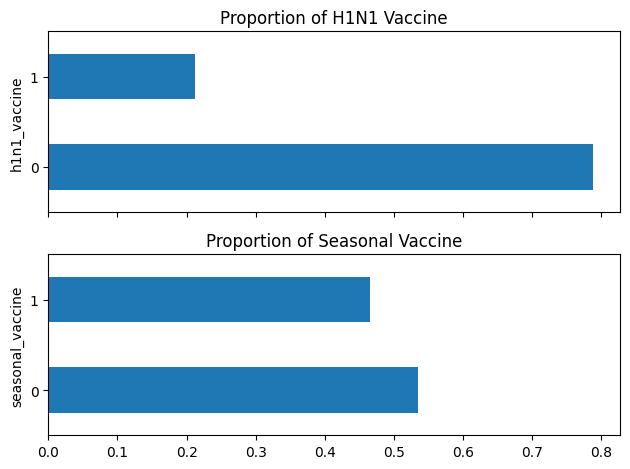

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

(labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

It shows that the seasonal flu vaccine target has balanced classes, but the H1N1 flu vaccine target has moderately **imbalanced classes**.

In [ ]:
pd.crosstab(
    labels_df["h1n1_vaccine"],
    labels_df["seasonal_vaccine"],
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [ ]:
# Phi Coefficient is the same as Pearson for two binary variables
phi_coefficient =(labels_df["h1n1_vaccine"]
     .corr(labels_df["seasonal_vaccine"], method="pearson")
)
print(f'These two variables have a phi coefficient of {phi_coefficient}')

These two variables have a phi coefficient of 0.37714265306144495


## **Features**

Clean Missing Values using Imputation Strategy


In [ ]:
# Identify columns based on their data type and purpose
num_cols = features_df.select_dtypes('number').columns  # Numerical columns (e.g., age, income)
cat_cols = ['race', 'sex', 'marital_status', 'rent_or_own', 'hhs_geo_region',
            'census_msa']  # Categorical columns
ord_cols = ['age_group', 'education', 'income_poverty', 'employment_status']  # Ordinal (ordered categorical) columns

In [ ]:
missing_percentage = (features_df.isnull().sum() / len(features_df)) * 100
print(missing_percentage)

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             


**Missing Value Impute Strategies**

1. **Columns with No Missing Values (0.0%)**:
age_group, race, sex, hhs_geo_region, census_msa, h1n1_vaccine, seasonal_vaccine

2. **Columns with Minor Missing Values (<20%)**:behavioral_face_mask, behavioral_wash_hands, household_adults, household_children, income_poverty         
  
  Strategy:
  - Replace missing values with the mean, median, or mode for numerical data; using 'missing' for categorical data.

3. **Columns with Critical Missing Values (>40%)**: employment_industry (49.91%) and employment_occupation (50.43%) health_insurance (45.96%)              
    
    Strategy:
    - If employment details are critical, treat missing values as a separate category ('missing'). Alternatively,  dropping these columns entirely, as their high missing rate might introduce noise.

In [ ]:
# Function to analyze only numerical columns
def analyze_numerical_columns(df, num_cols):
    analysis = []

    for col in num_cols:
        skewness = df[col].skew()  # Calculate skewness
        missing_pct = df[col].isnull().mean() * 100  # Calculate percentage of missing values
        if missing_pct > 0:  # Only consider columns with missing values
            recommendation = "mean" if abs(skewness) < 1 else "median"  # Choose mean or median based on skewness
            analysis.append({
                "Column": col,
                "Missing (%)": missing_pct,
                "Skewness": skewness,
                "Recommendation": recommendation
            })

    return pd.DataFrame(analysis)

# Analyze numerical columns
numerical_analysis_df = analyze_numerical_columns(test_df, num_cols)

# Save analysis to CSV or print it
numerical_analysis_df.to_csv("numerical_imputation_analysis.csv", index=False)
print(numerical_analysis_df)


                         Column  Missing (%)  Skewness Recommendation
0                  h1n1_concern     0.318257 -0.167140           mean
1                h1n1_knowledge     0.456792 -0.236853           mean
2     behavioral_antiviral_meds     0.295792  4.146944         median
3          behavioral_avoidance     0.797514 -1.035036         median
4          behavioral_face_mask     0.071140  3.392642         median
5         behavioral_wash_hands     0.149768 -1.720685         median
6   behavioral_large_gatherings     0.269582  0.622027           mean
7       behavioral_outside_home     0.307024  0.688643           mean
8         behavioral_touch_face     0.479257 -0.790333           mean
9              doctor_recc_h1n1     8.087464  1.333304         median
10         doctor_recc_seasonal     8.087464  0.706113           mean
11        chronic_med_condition     3.489591  0.974298           mean
12         child_under_6_months     3.044032  2.946455         median
13                he

In [ ]:
# Function to analyze only numerical columns
def analyze_numerical_columns(df, num_cols):
    analysis = []

    for col in num_cols:
        skewness = df[col].skew()  # Calculate skewness
        missing_pct = df[col].isnull().mean() * 100  # Calculate percentage of missing values
        if missing_pct > 0:  # Only consider columns with missing values
            recommendation = "mean" if abs(skewness) < 1 else "median"  # Choose mean or median based on skewness
            analysis.append({
                "Column": col,
                "Missing (%)": missing_pct,
                "Skewness": skewness,
                "Recommendation": recommendation
            })

    return pd.DataFrame(analysis)

In [ ]:
# Function to impute missing values
def impute_missing_values(df, recommendations):
    for _, row in recommendations.iterrows():
        column = row['Column']
        strategy = row['Recommendation']

        if strategy == 'mean':
            df[column] = df[column].fillna(df[column].mean())
        elif strategy == 'median':
            df[column] = df[column].fillna(df[column].median())
        elif strategy == 'mode':
            df[column] = df[column].fillna(df[column].mode()[0])
    return df

new_feature_df = impute_missing_values(features_df, numerical_analysis_df)
new_feature_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
# test new new missing percentage after impute missing values
new_missing_percentage = (new_feature_df.isnull().sum() / len(new_feature_df)) * 100
print(new_missing_percentage)

h1n1_concern                    0.000000
h1n1_knowledge                  0.000000
behavioral_antiviral_meds       0.000000
behavioral_avoidance            0.000000
behavioral_face_mask            0.000000
behavioral_wash_hands           0.000000
behavioral_large_gatherings     0.000000
behavioral_outside_home         0.000000
behavioral_touch_face           0.000000
doctor_recc_h1n1                0.000000
doctor_recc_seasonal            0.000000
chronic_med_condition           0.000000
child_under_6_months            0.000000
health_worker                   0.000000
health_insurance                0.000000
opinion_h1n1_vacc_effective     0.000000
opinion_h1n1_risk               0.000000
opinion_h1n1_sick_from_vacc     0.000000
opinion_seas_vacc_effective     0.000000
opinion_seas_risk               0.000000
opinion_seas_sick_from_vacc     0.000000
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

In [ ]:
# Drop the specified columns with high missing values
columns_to_drop = ['employment_industry', 'employment_occupation', 'health_insurance']
new_feature_df = new_feature_df.drop(columns=columns_to_drop)
new_feature_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0


In [ ]:
# Fill missing values for categorical columns
for col in cat_cols:
    new_feature_df[col] = new_feature_df[col].fillna('missing')

In [ ]:
# Apply one-hot encoding to categorical columns
new_feature_df = pd.get_dummies(new_feature_df, columns=cat_cols, drop_first=True)

In [ ]:
# Define ordinal mappings
ordinal_mappings = {
    'age_group': {
        '18 - 34 Years': 1,
        '35 - 44 Years': 2,
        '45 - 54 Years': 3,
        '55 - 64 Years': 4,
        '65+ Years': 5,
        'missing': None  # Assign None for missing values to handle later
    },
    'education': {
        '< 12 Years': 1,
        '12 Years': 2,
        'Some College': 3,
        'College Graduate': 4,
        'missing': None  # Assign None for missing values to handle later
    },
    'income_poverty': {
        'Below Poverty': 1,
        '<= $75,000, Above Poverty': 2,
        '> $75,000': 3,
        'missing': None  # Assign None for missing values to handle later
    },
    'employment_status': {
        'Unemployed': 1,
        'Employed': 2,
        'Not in Labor Force': 3,
        'missing': None  # Assign None for missing values to handle later
    }
}


In [ ]:
# Map ordinal columns to numeric values and fill missing values with the median
for col, mapping in ordinal_mappings.items():
    # Map ordinal categories to numeric
    new_feature_df[col] = new_feature_df[col].map(mapping)

    # Fill missing values with the median rank
    new_feature_df[col] = new_feature_df[col].fillna(new_feature_df[col].median())


In [ ]:
print(new_feature_df[ord_cols].head())  # Check processed ordinal columns
print(new_feature_df[ord_cols].isnull().sum())  # Ensure no missing values

               age_group  education  income_poverty  employment_status
respondent_id                                                         
0                    4.0        1.0             1.0                3.0
1                    2.0        2.0             1.0                2.0
2                    1.0        4.0             2.0                2.0
3                    5.0        2.0             1.0                3.0
4                    3.0        3.0             2.0                2.0
age_group            0
education            0
income_poverty       0
employment_status    0
dtype: int64


In [ ]:
# Verify the results: Check if any missing values remain
print("After processing:")
print(new_feature_df.isnull().sum())  # Ensure no missing values remain

After processing:
h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_h1n1                  0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
opinion_h1n1_vacc_effective       0
opinion_h1n1_risk                 0
opinion_h1n1_sick_from_vacc       0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                         0
income_poverty                    0
employment_status                 0
household_adults                  0
household_children                0
race_Hispanic                     0
race_Other

In [ ]:
clean_joined_df = new_feature_df.join(labels_df)
print(clean_joined_df.shape)
clean_joined_df.head()

(26707, 47)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,False,False,False,False,True,False,False,True,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,False,True,False,False,False,False,True,False,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,True,False,False,0,0


Prototyping a Plot

In [ ]:
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.000000,2849,447
1.000000,6756,1397
1.618486,76,16
2.000000,8102,2473
3.000000,3250,1341


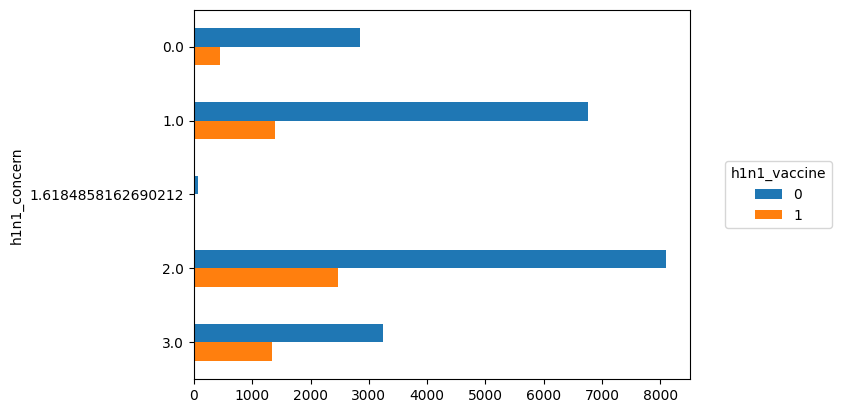

In [ ]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right',
    bbox_to_anchor=(1.3, 0.5),
    title='h1n1_vaccine'
)

In [ ]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

,0
h1n1_concern,
0.000000,3296
1.000000,8153
1.618486,92
2.000000,10575
3.000000,4591


In [ ]:
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.000000,0.864381,0.135619
1.000000,0.828652,0.171348
1.618486,0.826087,0.173913
2.000000,0.766147,0.233853
3.000000,0.707907,0.292093


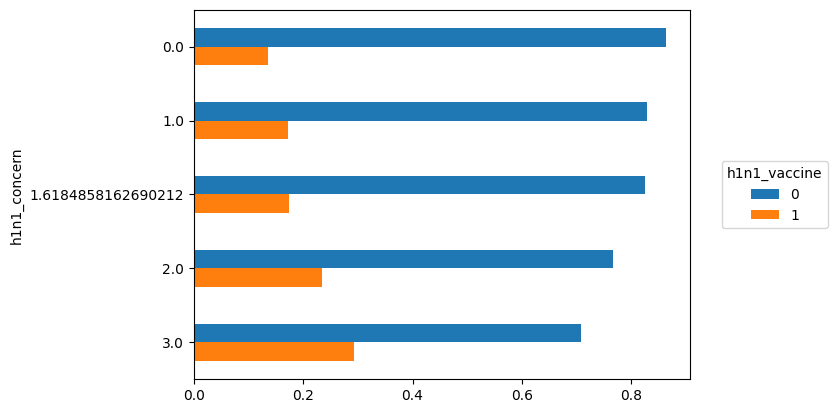

In [ ]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

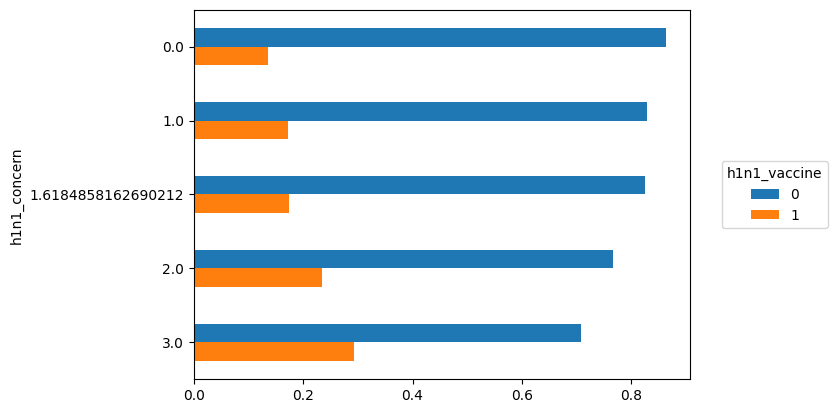

In [ ]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

Plotting more variables

In [ ]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against
    `col`.

    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

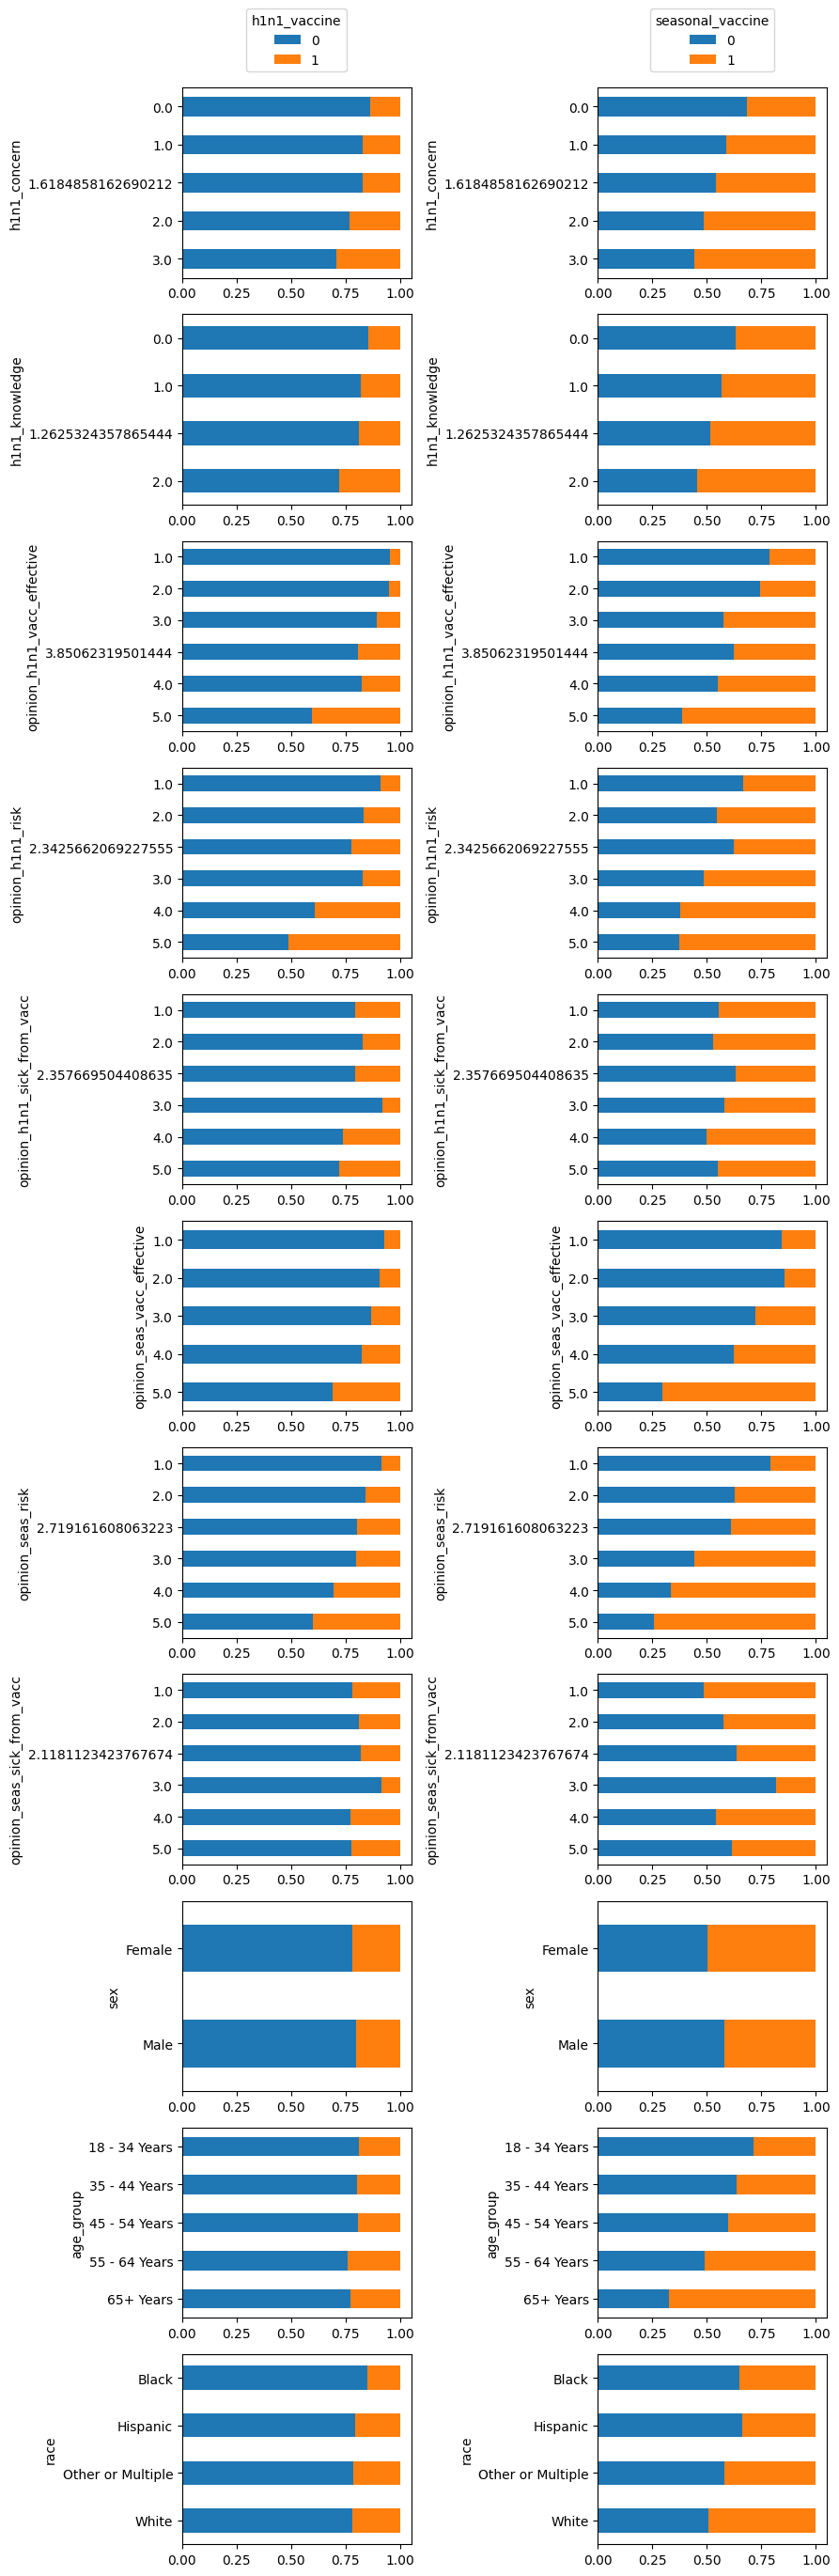

In [ ]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )

ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

# Correlation

In [ ]:
new_feature_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,...,False,False,False,False,False,False,True,False,False,True
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,False,False,False,False,False,False,False,True,False,False
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.0,...,False,False,False,True,False,False,False,False,True,False
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,0.0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,...,False,False,False,False,False,False,False,True,False,True
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,...,False,False,False,False,True,False,False,False,True,False
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.0,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# Select numerical and boolean columns
combined_data = new_feature_df.select_dtypes(include=['number','bool'])

In [ ]:
# Compute the correlation matrix
correlation_matrix = combined_data.corr(method='pearson')  # Use 'spearman' if non-linear relationships are suspected

# Display the correlation matrix
print(correlation_matrix)


                                h1n1_concern  h1n1_knowledge  \
h1n1_concern                        1.000000        0.062081   
h1n1_knowledge                      0.062081        1.000000   
behavioral_antiviral_meds           0.089855       -0.010576   
behavioral_avoidance                0.230457        0.086748   
behavioral_face_mask                0.155453        0.030026   
behavioral_wash_hands               0.292297        0.089103   
behavioral_large_gatherings         0.254137       -0.048697   
behavioral_outside_home             0.245597       -0.067895   
behavioral_touch_face               0.246809        0.085646   
doctor_recc_h1n1                    0.137258        0.093836   
doctor_recc_seasonal                0.129469        0.068533   
chronic_med_condition               0.092824       -0.021939   
child_under_6_months                0.048610        0.025906   
health_worker                       0.032996        0.171296   
opinion_h1n1_vacc_effective         0.23

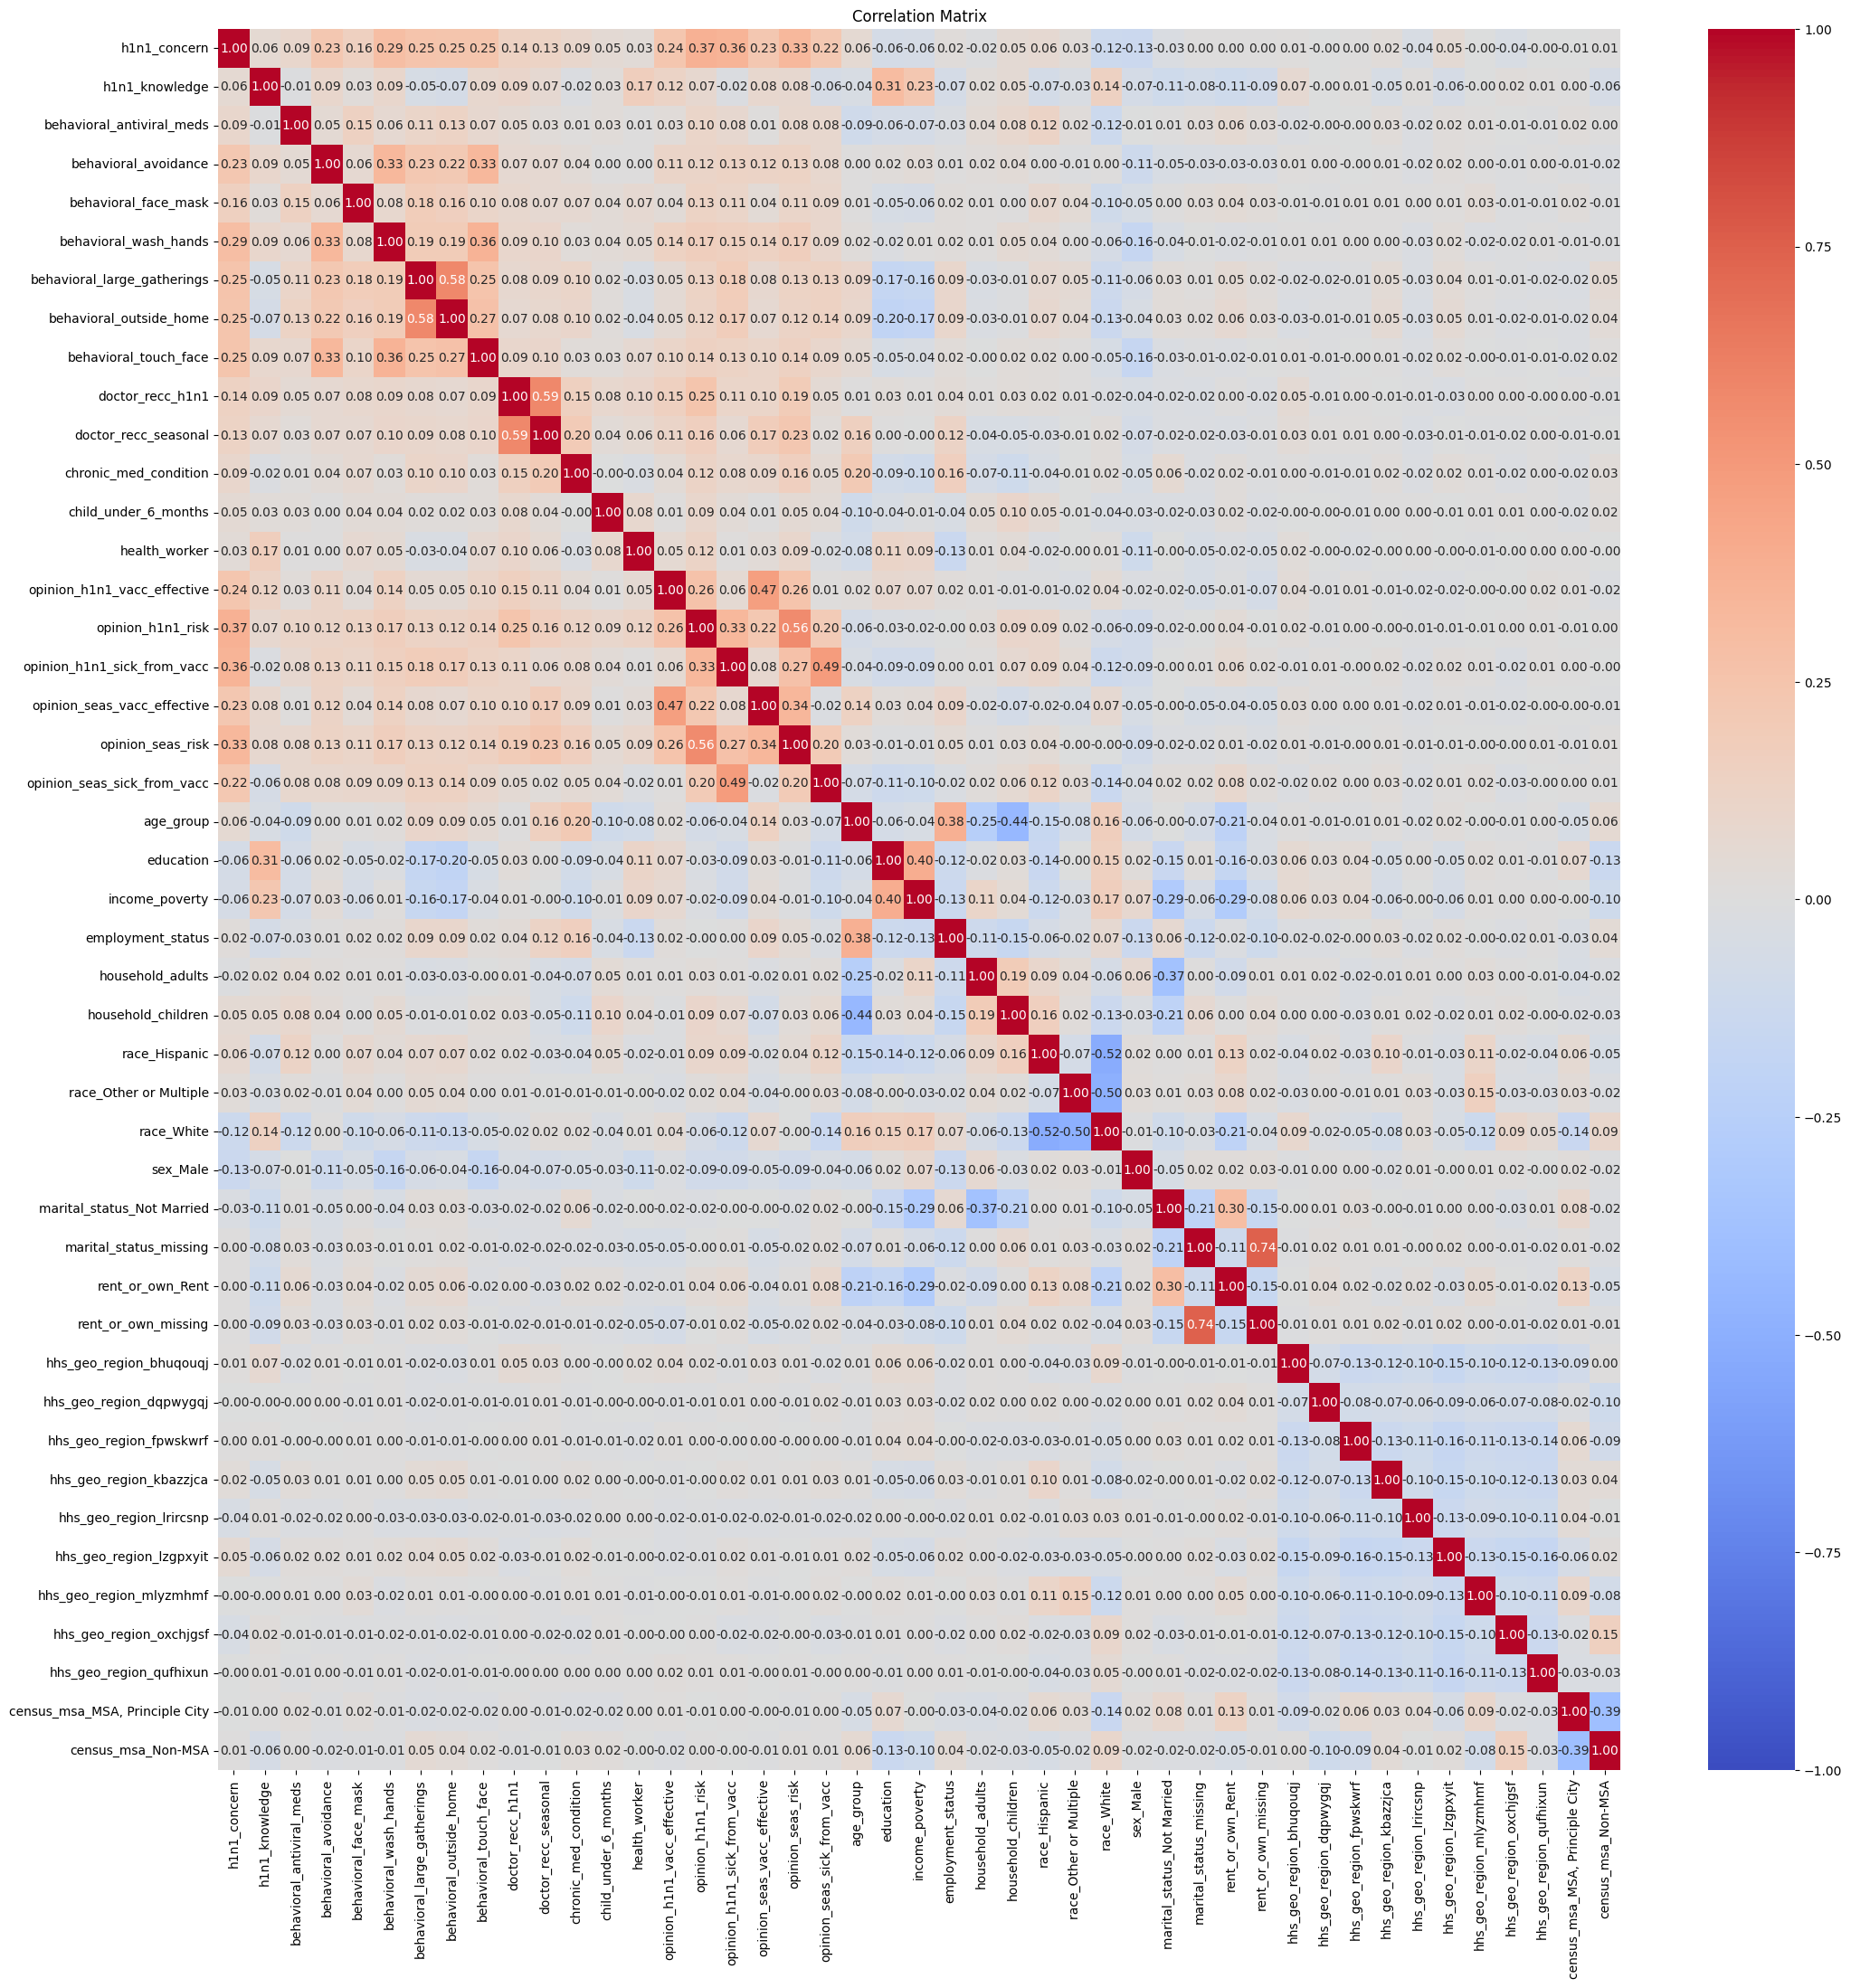

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Set a correlation threshold
threshold = 0.8

# Get pairs of highly correlated features
high_corr_pairs = (
    correlation_matrix.where(abs(correlation_matrix) > threshold)  # Filter by threshold
    .stack()  # Turn into long format
    .reset_index()
)

# Rename columns for clarity
high_corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Remove self-correlations (correlation = 1)
high_corr_pairs = high_corr_pairs[high_corr_pairs['Feature_1'] != high_corr_pairs['Feature_2']]

# Sort by absolute correlation value
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

print("Highly Correlated Pairs:")
print(high_corr_pairs)


Highly Correlated Pairs:
Empty DataFrame
Columns: [Feature_1, Feature_2, Correlation]
Index: []


In [ ]:
# Save joined_df to a CSV file
clean_joined_df.to_csv('new_clean_joined_df.csv', index=True)  # Save with index included


In [ ]:
print("clean_joined_df.shape", clean_joined_df.shape)
clean_joined_df.head()

clean_joined_df.shape (26707, 47)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,False,False,False,False,True,False,False,True,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,False,True,False,False,False,False,True,False,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,True,False,False,0,0
